NAME : amirhossein bagheri \\
STUDENT ID : 98105621

In [ ]:
import datetime
import gym
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

In [ ]:
class DQAgent:
    def __init__(self, env):
        self.env = env
        num_states = (env.observation_space.high - env.observation_space.low) * np.array([10, 100])
        num_states = np.round(num_states, 0).astype(int) + 1
        self.Q = np.zeros((num_states[0], num_states[1],env.action_space.n))
        self.min = env.observation_space.low
    def save(self, path,start,end):
        np.save(path, self.Q)
        file = open('training_time.txt', 'w')
        file.write("start time is : "+str(start)+"\n"+"end time is : "+str(end)+"\n"+"total time is : "+str(end - start))
        file.close()
    def load(self, path):
        self.Q = np.load(path)
    def test(self):
      reward = 0
      env = self.env
      Q = self.Q
      obs = env.reset()
      done = False
      while done != True:
        state = self.get_state(obs)
        action = np.argmax(Q[state[0], state[1]])
        obs, r, done, info = env.step(action)
        reward +=r
        if done and obs[0] >= 0.5:
          break
      return reward
    def get_state(self,obs):
      return np.round((obs - self.min) * np.array([10, 100])).astype(int)
    def train(self, learning, discount, epsilon, minE, episodes):
        reduction = (epsilon - minE) / episodes
        env = self.env
        Q = self.Q
        start = datetime.now()
        for e in range(episodes) :
            done = False
            obs = env.reset()
            current = self.get_state(obs)
            while done != True:
                i,j = current[0],current[1]
                action = np.argmax(Q[i, j]) if np.random.random() > epsilon else np.random.randint(0, 3)
                obs, reward, done, info = env.step(action)
                next_state = self.get_state(obs)
                i_p,j_p = next_state[0],next_state[1]
                if done and obs[0] >= 0.5:
                    Q[i,j, action] = reward
                else:
                    Q[i,j, action] += learning * (reward + discount * np.max(Q[i_p,j_p]) -Q[i,j, action])
                current = next_state
                epsilon -= reduction
        env.close()
        self.Q = Q
        end = datetime.now()
        self.save("policy",start,end)
        return start,end

In [ ]:
!pip install matplotlib
!pip install gym

<div dir="rtl">
حال به شرح تکه کد بالا می‌پردازیم:
در قسمت constructorدو کار انجام می‌شود یکی آنکه مقادیر Q-table ها با مقادیر صفر پر می‌شوند که یک آرایه ۳ بعدی است که دو بعد اول آن معرف استیت و هر استیت یک آرایه به طول ۳ از مقادیر است که نشان دهنده مقدار value آن اکشن آن استیت است.
همچنین مقادیر minimum سرعت و مختصات نیز ذخیره می‌شوند زیرا برای محاسبه استیت به آنها نیاز داریم.
</div>

<div dir="rtl">
بدست آوردن استیت:
از‌آنجا که فضا پیوسته است برای محاسبه استیت نیاز به گسسته سازی آن داریم مقادیر بین بازه های سرعت و مختصات را رب حسب بیشترین دقت اعشاری اشان  , تقسیم بندی می‌کنیم به صورتی که بازه سرعت به بازه های 0.01تبدیل شده و بازه مختصات به بازه های 0.1 تقسیم می‌شود .
</div>
<div dir="rtl">
تابع get_state(): این تابع به سادگی اندیس استیت های مورد نظر را می دهید به صورتی که minimum را از سرعت و مختصات فعلی کم کرده و اعداد را در ۱۰ و۱۰۰ ضرب کرده و رند می‌کند.
</div>
<div dir="rtl">
توابع load  و save واضح اند.

</div>
<div dir="rtl">
تابع test محیط را یکبار ران می‌کند و برحسب جدول Q ها action مناسب را انتخاب می‌کند و ریوارد های هر action را جمع می‌زند و در آخر آنرا ریترن می‌کند.
</div>
<div dir="rtl">
تابع train(): این تابع ۵ آرگومان ورودی می‌گیرد که در ادامه به شرح و بررسی هر کدام مب‌پردازیم:

</div>
<div dir="rtl">
learning : همیان پارامتر learning rate در الگوریتم Q learning 
</div>
<div dir="rtl">
discount : دراین مساله مقدار آن یک فرض می‌شود.

</div>
<div dir="rtl">
epsilon , minE : در روش مورد استفاده ما که روش epsilon decay یا epsilon greedy نام دارد مقدار اولیه epsilon مشخص می  کند که از ابتدا چقدر agent به exploreبپردازد هر چه مقدار آن بیشتر باشد بیشتر به اکسپلور پرداحته می‌شود.
دقت کنید که با روند رو به جلو الگوریتم این مقدار کاهش می‌یابد  تا در نهایت با کانورج دیگر الگوریتم اکسپلور انجام ندهد.
. مقدار minE نیز کران پایین مقدار اپسیلون است.
</div>
<div dir="rtl">
episodes  : تعداد اپیزود های را مشخص می‌کند.

</div>
<div dir="rtl">
فرایند train :
</div>
</div>
<div dir="rtl">
در ابتدا چون اپسیلون زیاد است agent می تواند اکسپلور انجام دهد. و پس از مدتی مقدار اپسیلون کاهش می‌یابد و agent بر حسب مقادیر Q ها تصمیم می‌گیرد(به احتمال زیاد). دقت کنید که در هر مرحله به صورت on policy مقادیر Q اپدیت می‌شود.
</div>
<div dir="rtl">
پارامتر های learning , episods بر اساس چندین بار آزمایش مقادیر مطلوبشان بدست آمده است.
</div>



<div dir="rtl">
همانطور که مشاهده می‌کنید با ۵۰۰۰۰ اپیزود و مدت ترین ۱۱ دقیقه مدل را ترین کرده و نتایج را در قالب یک فایل به اسم policy ذخیره می‌کنیم.
</div>

In [ ]:
env = gym.make("MountainCar-v0")
agent = DQAgent(env)
start,end = agent.train(learning = 0.25, discount = 1, epsilon = 1, minE = 0, episodes = 50000  )
print("traning time : ",end - start)

traning time :  0:09:29.006052


<div dir="rtl">
در طی ۱۱ دقیقه مدل ترین شده و مقادیر qاماده استفاده برای بخش تست هستند.
</div>

<div dir="rtl">
در قسمت زیر مدل را ۱۰۰۰۰ بار تست می‌کنیم و نتایج تست هارا در یک آرایه ذخیره می‌کنیم. و آنرا در قالب یک npy ذخیره می‌کنیم.
دقت کنید از آنجا که q های نهایی را در قسمت قبی ذخیره کرده ایم در این قسمت یک مدل جدید می‌سازیم و مقادیر قسمت قبل را در آن لود می‌کنیم.
(اینکار به جهت سهولت برای اجرای سل ها انجام شده است.)
</div>

In [ ]:
env = gym.make("MountainCar-v0")
agent = DQAgent(env)
agent.load("policy.npy")
rewards = []
for i in range(10000):
  rewards.append(agent.test())
np.save("reward_list_results", np.array(rewards))


<div dir="rtl">
در قسمت زیر به بررسی مقادیر بدست آمده از ۱۰۰۰ تست می‌پردازیم.
اینکه چه تعداد از انها کمتر از -150 شده اند و چه تعداد از آنها کمتر از -140شده اند.
میانگین ریوارد های چه عددیست و standard deviationاشان  همچنین با استفاده از histogram مقادیر ریوارد های بدست آمده را نشان می‌دهیم.
 
</div>

number of more than -140 from 10000 test : 9786 97.86%
number of more than -150 from 10000 test :  10000 100.0%
rewards mean is : -137.3932
rewards std is : 1.9314745041030184


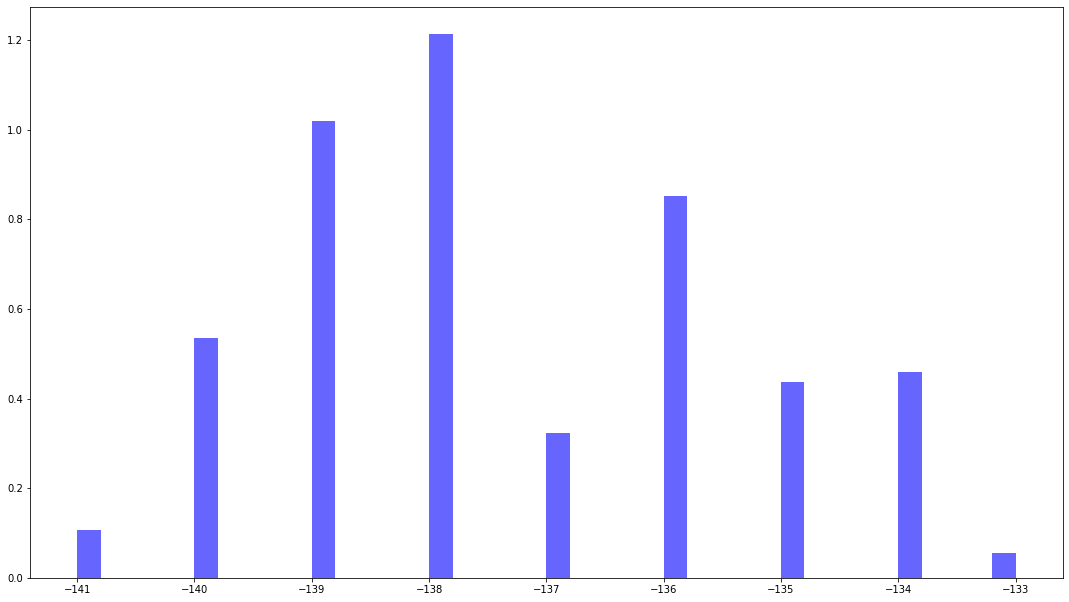

In [ ]:
array = np.load("reward_list_results.npy")
file = open('test_results.txt', 'w')
size = len(array)
s =sum(array >= -140)
res = "number of more than -140 from "+str(len(array))+" test : "+str(s)+" "+str(100*s/size)+"%\n"
s =sum(array >= -150)
res+="number of more than -150 from "+str(len(array))+" test :  "+str(s)+" "+str(100*s/size)+"%\n"
fig = plt.gcf()
fig.set_size_inches(18.5, 10.5)
plt.hist(array, bins=40, density=True, alpha=0.6, color='b')
plt.savefig("result_plot.png")
res+="rewards mean is : "+str(np.mean(rewards))+"\n"
res+="rewards std is : "+str(np.std(rewards))
file.write(res)
file.close()
print(res)